In [ ]:
from google.colab import drive
import pandas as pd

drive.mount('/drive')

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [ ]:
import os

os.chdir("/drive/MyDrive/inflation_reports") 
os.getcwd()

'/drive/MyDrive/inflation_reports'

In [ ]:
path = "/drive/MyDrive/inflation_reports/dataset/data.csv"
df = pd.read_csv(path, encoding='latin-1')

In [ ]:
# def to_sentiment(rating):

#   if rating == 'negative':
#     return 0
#   elif rating == 'neutral':
#     return 1
#   elif rating == 'positive':
#     return 2

# df['score'] = df.sentiment.apply(to_sentiment)

In [ ]:
!pip install torch==1.6.0 torchvision==0.7.0 torchtext==0.7.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import torch

import random
import numpy as np

SEED = 1234

random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.backends.cudnn.deterministic = True

In [ ]:
# check whether cuda is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [ ]:
!pip install transformers
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
init_token = tokenizer.cls_token
eos_token = tokenizer.sep_token
pad_token = tokenizer.pad_token
unk_token = tokenizer.unk_token

print(init_token, eos_token, pad_token, unk_token)

[CLS] [SEP] [PAD] [UNK]


In [ ]:
init_token_idx = tokenizer.cls_token_id
eos_token_idx = tokenizer.sep_token_id
pad_token_idx = tokenizer.pad_token_id
unk_token_idx = tokenizer.unk_token_id

print(init_token_idx, eos_token_idx, pad_token_idx, unk_token_idx)

101 102 0 100


In [ ]:
max_input_length = tokenizer.max_model_input_sizes['bert-base-uncased']

print(max_input_length)

512


In [ ]:
def tokenize_and_cut(sentence):
    tokens = tokenizer.tokenize(sentence) 
    tokens = tokens[:max_input_length-2]
    return tokens

In [ ]:
!pip install torchtext

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from torchtext import data

In [ ]:
TEXT = data.Field(batch_first = True,
                  use_vocab = False,
                  tokenize = tokenize_and_cut,
                  preprocessing = tokenizer.convert_tokens_to_ids,
                  init_token = init_token_idx,
                  eos_token = eos_token_idx,
                  pad_token = pad_token_idx,
                  unk_token = unk_token_idx)

LABEL = data.LabelField(batch_first = True,dtype = torch.float)

/usr/local/lib/python3.7/dist-packages/torchtext/data/field.py:150: UserWarning: Field class will be retired in the 0.8.0 release and moved to torchtext.legacy. Please see 0.7.0 release notes for further information.
  warnings.warn('{} class will be retired in the 0.8.0 release and moved to torchtext.legacy. Please see 0.7.0 release notes for further information.'.format(self.__class__.__name__), UserWarning)
/usr/local/lib/python3.7/dist-packages/torchtext/data/field.py:150: UserWarning: LabelField class will be retired in the 0.8.0 release and moved to torchtext.legacy. Please see 0.7.0 release notes for further information.
  warnings.warn('{} class will be retired in the 0.8.0 release and moved to torchtext.legacy. Please see 0.7.0 release notes for further information.'.format(self.__class__.__name__), UserWarning)


In [ ]:
from sklearn.model_selection import train_test_split
RANDOM_SEED = 42

for col in df.columns:
    print(col)

train_data, valid_data = train_test_split(df, test_size=0.1, random_state=RANDOM_SEED)

label
text


In [ ]:
!pip install datasets
import datasets
from datasets import Dataset, ClassLabel
dataset = Dataset.from_pandas(df)
dataset

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Dataset({
    features: ['label', 'text'],
    num_rows: 4846
})

In [ ]:
from sklearn.model_selection import train_test_split
RANDOM_SEED = 42

df.rename(columns = {'sentence':'text', 'sentiment':'label'}, inplace = True)

df_train, df_test = train_test_split(df, test_size=0.4, random_state=RANDOM_SEED)

In [ ]:
df_train = df_train.iloc[:, ::-1]
df_test = df_test.iloc[:, ::-1]

In [ ]:
df_test

,text,label
3207,The company was supposed to deliver machinery ...,neutral
1684,UNC Charlotte would also deploy SSH Tectia Con...,neutral
1044,"In 2009 , Lee & Man had a combined annual prod...",neutral
4145,`` That 's a very high figure on the European ...,neutral
1538,"In Finland , the corresponding service is Alma...",neutral
...,...,...
550,Kalnapilio-Tauro Grupe ( Kalnapilis-Tauras Gro...,positive
1424,The shares shall be repurchased through public...,neutral
2939,Honkarakenne also decided yesterday to sell 88...,neutral
2836,Blyk is launching first in the UK market in mi...,neutral


In [ ]:
df_train.to_csv('/drive/MyDrive/inflation_reports/dataset/train.csv', sep="\t",index=False)

In [ ]:
df_test.to_csv('/drive/MyDrive/inflation_reports/dataset/test.csv', sep="\t", index=False)

In [ ]:
fields = [('text', TEXT), ('label', LABEL)]
#loading custom dataset
training_data=data.TabularDataset(path ="/drive/MyDrive/inflation_reports/dataset/train.csv",format = 'tsv',fields = fields,skip_header = True)

/usr/local/lib/python3.7/dist-packages/torchtext/data/example.py:68: UserWarning: Example class will be retired in the 0.8.0 release and moved to torchtext.legacy. Please see 0.7.0 release notes for further information.
  warnings.warn('Example class will be retired in the 0.8.0 release and moved to torchtext.legacy. Please see 0.7.0 release notes for further information.', UserWarning)
/usr/local/lib/python3.7/dist-packages/torchtext/data/example.py:78: UserWarning: Example class will be retired in the 0.8.0 release and moved to torchtext.legacy. Please see 0.7.0 release notes for further information.
  warnings.warn('Example class will be retired in the 0.8.0 release and moved to torchtext.legacy. Please see 0.7.0 release notes for further information.', UserWarning)


In [ ]:
training_data.Features

<generator object Dataset.__getattr__ at 0x7ff5c0d7eb50>

In [ ]:
train_data, valid_data = training_data.split(split_ratio=0.8, random_state = random.seed(SEED))   #, random_state = random.seed(SEED)
# train_data, valid_data = train_data.split(split_ratio=0.8, random_state=random.seed(SEED))

In [ ]:
print(len(train_data))
print(len(valid_data))

2326
581


In [ ]:
LABEL.build_vocab(train_data)

print(LABEL.vocab.itos)
# No. of unique tokens in label
print("Size of LABEL vocabulary:", len(LABEL.vocab))

['neutral', 'positive', 'negative']
Size of LABEL vocabulary: 3


In [ ]:
BATCH_SIZE = 16

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)
train_iterator, valid_iterator = data.BucketIterator.splits(
    (train_data, valid_data), 
    batch_size = BATCH_SIZE, 
    sort_key=lambda x: len(x.text),

    device = device)

for i in valid_iterator:
    print(i)

cuda

[torchtext.data.batch.Batch of size 16]
	[.text]:[torch.cuda.LongTensor of size 16x11 (GPU 0)]
	[.label]:[torch.cuda.FloatTensor of size 16 (GPU 0)]

[torchtext.data.batch.Batch of size 16]
	[.text]:[torch.cuda.LongTensor of size 16x13 (GPU 0)]
	[.label]:[torch.cuda.FloatTensor of size 16 (GPU 0)]

[torchtext.data.batch.Batch of size 16]
	[.text]:[torch.cuda.LongTensor of size 16x15 (GPU 0)]
	[.label]:[torch.cuda.FloatTensor of size 16 (GPU 0)]

[torchtext.data.batch.Batch of size 16]
	[.text]:[torch.cuda.LongTensor of size 16x16 (GPU 0)]
	[.label]:[torch.cuda.FloatTensor of size 16 (GPU 0)]

[torchtext.data.batch.Batch of size 16]
	[.text]:[torch.cuda.LongTensor of size 16x17 (GPU 0)]
	[.label]:[torch.cuda.FloatTensor of size 16 (GPU 0)]

[torchtext.data.batch.Batch of size 16]
	[.text]:[torch.cuda.LongTensor of size 16x18 (GPU 0)]
	[.label]:[torch.cuda.FloatTensor of size 16 (GPU 0)]

[torchtext.data.batch.Batch of size 16]
	[.text]:[torch.cuda.LongTensor of size 16x18 (GPU 0)]

/usr/local/lib/python3.7/dist-packages/torchtext/data/iterator.py:48: UserWarning: BucketIterator class will be retired in the 0.8.0 release and moved to torchtext.legacy. Please see 0.7.0 release notes for further information.
  warnings.warn('{} class will be retired in the 0.8.0 release and moved to torchtext.legacy. Please see 0.7.0 release notes for further information.'.format(self.__class__.__name__), UserWarning)
/usr/local/lib/python3.7/dist-packages/torchtext/data/batch.py:23: UserWarning: Batch class will be retired in the 0.8.0 release and moved to torchtext.legacy. Please see 0.7.0 release notes for further information.
  warnings.warn('{} class will be retired in the 0.8.0 release and moved to torchtext.legacy. Please see 0.7.0 release notes for further information.'.format(self.__class__.__name__), UserWarning)


In [ ]:
from transformers import BertTokenizer, BertModel

bert = BertModel.from_pretrained('bert-base-uncased') # it is important to use the same model and tokenizer

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
import torch.nn as nn

class BERTLSTMSentiment(nn.Module):
    def __init__(self,
                 bert,
                 hidden_dim,
                 output_dim,
                 n_layers,
                 bidirectional,
                 dropout):
        
        super().__init__()
        
        self.bert = bert
        
        embedding_dim = bert.config.to_dict()['hidden_size']
        
        self.rnn = nn.LSTM(embedding_dim,
                          hidden_dim,
                          num_layers = n_layers,
                          bidirectional = bidirectional,
                          batch_first = True,
                          dropout = dropout)
        
        self.out = nn.Linear(hidden_dim * 2 if bidirectional else hidden_dim, output_dim)
        
        self.dropout = nn.Dropout(dropout)
        
    def forward(self, text):
        
        print('text:', text)
        #text = [batch size, sent len]
                
        with torch.no_grad():
            print('embedded dimensions', self.bert(text)[0] )
            embedded = self.bert(text)[0][0]
            print(self,bert(text)[0][0])

        print('embedded:', embedded)    
                
        #embedded = [batch size, sent len, emb dim]
        
        _, hidden = self.rnn(embedded)
        
        #hidden = [n layers * n directions, batch size, emb dim]
        
        if self.rnn.bidirectional:
            
            hidden = self.dropout(torch.cat((hidden[-2,:,:], hidden[-1,:,:]), dim = 3))
        else:
            hidden = self.dropout(hidden[-1,:,:])
                
        #hidden = [batch size, hid dim]
        
        output = self.out(hidden)
           
        return output
            

In [ ]:
import torch.nn as nn
from torch.autograd import Variable

class BERTLSTMSentiment(nn.Module):
      def __init__(self,
                  bert,
                  hidden_dim,
                  output_dim,
                  n_layers,
                  bidirectional,
                  dropout,
                  batch_size):
          
          super().__init__()

          self.hidden_dim = hidden_dim
          self.bert = bert
          
          embedding_dim = bert.config.to_dict()['hidden_size']
          
          self.lstm = nn.LSTM(embedding_dim, hidden_dim)
          
          self.label = nn.Linear(hidden_dim, output_dim)
          
          self.dropout = nn.Dropout(dropout)
          self.batch_size= batch_size
          
	
      def forward(self, input_sentence, batch_size=None):

        with torch.no_grad():
          embedded = self.bert(input_sentence)[0]

        input = embedded.permute(1, 0, 2)

     
        output, (final_hidden_state, final_cell_state) = self.lstm(input)
        final_output = self.label(final_hidden_state[-1]) # final_hidden_state.size() = (1, batch_size, hidden_size) & final_output.size() = (batch_size, output_size)
        
        return final_output

In [ ]:
HIDDEN_DIM = 768
OUTPUT_DIM = 3
N_LAYERS = 2
BIDIRECTIONAL = False
DROPOUT = 0.25
BATCH_SIZE = 16

model = BERTLSTMSentiment(bert,
                         HIDDEN_DIM,
                         OUTPUT_DIM,
                         N_LAYERS,
                         BIDIRECTIONAL,
                         DROPOUT,
                         BATCH_SIZE)


In [ ]:
!pip install torch-summary

from torchsummary import summary

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# print network summary
summary(model,input_size=(768,),depth=3,batch_dim=1, dtypes=['torch.IntTensor'])


Layer (type:depth-idx)                   Param #
├─BertModel: 1-1                         --
|    └─BertEmbeddings: 2-1               --
|    |    └─Embedding: 3-1               (23,440,896)
|    |    └─Embedding: 3-2               (393,216)
|    |    └─Embedding: 3-3               (1,536)
|    |    └─LayerNorm: 3-4               (1,536)
|    |    └─Dropout: 3-5                 --
|    └─BertEncoder: 2-2                  --
|    |    └─ModuleList: 3-6              (85,054,464)
|    └─BertPooler: 2-3                   --
|    |    └─Linear: 3-7                  (590,592)
|    |    └─Tanh: 3-8                    --
├─LSTM: 1-2                              4,724,736
├─Linear: 1-3                            2,307
├─Dropout: 1-4                           --
Total params: 114,209,283
Trainable params: 4,727,043
Non-trainable params: 109,482,240


Layer (type:depth-idx)                   Param #
├─BertModel: 1-1                         --
|    └─BertEmbeddings: 2-1               --
|    |    └─Embedding: 3-1               (23,440,896)
|    |    └─Embedding: 3-2               (393,216)
|    |    └─Embedding: 3-3               (1,536)
|    |    └─LayerNorm: 3-4               (1,536)
|    |    └─Dropout: 3-5                 --
|    └─BertEncoder: 2-2                  --
|    |    └─ModuleList: 3-6              (85,054,464)
|    └─BertPooler: 2-3                   --
|    |    └─Linear: 3-7                  (590,592)
|    |    └─Tanh: 3-8                    --
├─LSTM: 1-2                              4,724,736
├─Linear: 1-3                            2,307
├─Dropout: 1-4                           --
Total params: 114,209,283
Trainable params: 4,727,043
Non-trainable params: 109,482,240

In [ ]:
model

BERTLSTMSentiment(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=

In [ ]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'The model has {count_parameters(model):,} trainable parameters')

The model has 4,727,043 trainable parameters


In [ ]:
for name, param in model.named_parameters():                
    if name.startswith('bert'):
        param.requires_grad = False

In [ ]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'The model has {count_parameters(model):,} trainable parameters')

The model has 4,727,043 trainable parameters


In [ ]:
for name, param in model.named_parameters():                
    if param.requires_grad:
        print(name)

lstm.weight_ih_l0
lstm.weight_hh_l0
lstm.bias_ih_l0
lstm.bias_hh_l0
label.weight
label.bias


In [ ]:
import torch.optim as optim

optimizer = optim.Adam(model.parameters())
criterion = nn.BCEWithLogitsLoss()

In [ ]:
# check whether cuda is available
if torch.cuda.is_available():    
    # If a GPU is available tell PyTorch to use the GPU.    
    device = torch.device("cuda")
    # Print that a GPU is available and its name
    print('There are %d GPU(s) available.' % torch.cuda.device_count())
    print('We will use the GPU:', torch.cuda.get_device_name(0))
# If a GPU is not available print the following statement
else:
    print('No GPU available, using the CPU instead.')

There are 1 GPU(s) available.
We will use the GPU: Tesla P100-PCIE-16GB


In [ ]:
model = model.to(device)
criterion = criterion.to(device)

In [ ]:
def binary_accuracy(preds, y):
    #round predictions to the closest integer
    rounded_preds = torch.round(torch.sigmoid(preds))
    correct = (rounded_preds == y).float() #convert into float for division 
    acc = correct.sum() / len(correct)
    return acc

In [ ]:
def train(model, iterator, optimizer, criterion):
    
    epoch_loss = 0
    epoch_acc = 0
    
    model.train()
    
    for batch in iterator:
        
        optimizer.zero_grad()
        
        predictions = model(batch.text).squeeze(1)
        
        loss = criterion(predictions, batch.label)
        
        acc = binary_accuracy(predictions, batch.label)
        
        loss.backward()
        
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [ ]:
def evaluate(model, iterator, criterion):
    
    epoch_loss = 0
    epoch_acc = 0
    
    model.eval()
    
    with torch.no_grad():
    
        for batch in iterator:

            predictions = model(batch.text).squeeze(1)
            
            loss = criterion(predictions, batch.label)
            
            acc = binary_accuracy(predictions, batch.label)

            epoch_loss += loss.item()
            epoch_acc += acc.item()
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [ ]:
import time

def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

In [ ]:
N_EPOCHS = 10

best_valid_loss = float('inf')

for epoch in range(N_EPOCHS):
    
    start_time = time.time()
    
    train_loss, train_acc = train(model, train_iterator, optimizer, criterion)
    valid_loss, valid_acc = evaluate(model, valid_iterator, criterion)
        
    end_time = time.time()
        
    epoch_mins, epoch_secs = epoch_time(start_time, end_time)
        
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'LSTM.PT')
    
    print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')

In [ ]:
def f1_loss(y_pred:torch.Tensor, y_true:torch.Tensor, is_training=False):
    '''Calculate F1 score. Can work with gpu tensors'''
   
    assert y_true.ndim == 1
    assert y_pred.ndim == 1 or y_pred.ndim == 2
    
    if y_pred.ndim == 2:
        y_pred = y_pred.argmax(dim=1)
    
    y_pred = torch.round(torch.sigmoid(y_pred))
   
   

    
    tp = (y_true * y_pred).sum().to(torch.float32)
    tn = ((1 - y_true) * (1 - y_pred)).sum().to(torch.float32)
    fp = ((1 - y_true) * y_pred).sum().to(torch.float32)
    fn = (y_true * (1 - y_pred)).sum().to(torch.float32)
    
    epsilon = 1e-7
    
    precision = tp / (tp + fp + epsilon)
    recall = tp / (tp + fn + epsilon)
    
    f1 = 2* (precision*recall) / (precision + recall + epsilon)
    f1.requires_grad = is_training
    return f1, precision, recall, tp, tn, fp, fn


In [ ]:
N_EPOCHS = 20

best_valid_loss = float('inf')

for epoch in range(N_EPOCHS):
    
    start_time = time.time()
    
    train_loss, train_acc = train(model, train_iterator, optimizer, criterion)
    valid_loss, valid_acc = evaluate(model, valid_iterator, criterion)
        
    end_time = time.time()
        
    epoch_mins, epoch_secs = epoch_time(start_time, end_time)
        
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'LSTM.PT')
    
    print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')


/usr/local/lib/python3.7/dist-packages/torchtext/data/batch.py:23: UserWarning: Batch class will be retired in the 0.8.0 release and moved to torchtext.legacy. Please see 0.7.0 release notes for further information.
  warnings.warn('{} class will be retired in the 0.8.0 release and moved to torchtext.legacy. Please see 0.7.0 release notes for further information.'.format(self.__class__.__name__), UserWarning)


Epoch: 01 | Epoch Time: 1m 12s
	Train Loss: 0.261 | Train Acc: 90.53%
	 Val. Loss: 0.222 |  Val. Acc: 91.84%
Epoch: 02 | Epoch Time: 1m 11s
	Train Loss: 0.211 | Train Acc: 92.02%
	 Val. Loss: 0.206 |  Val. Acc: 92.53%
Epoch: 03 | Epoch Time: 1m 11s
	Train Loss: 0.207 | Train Acc: 92.21%
	 Val. Loss: 0.211 |  Val. Acc: 91.92%
Epoch: 04 | Epoch Time: 1m 11s
	Train Loss: 0.195 | Train Acc: 92.62%
	 Val. Loss: 0.204 |  Val. Acc: 92.89%
Epoch: 05 | Epoch Time: 1m 11s
	Train Loss: 0.186 | Train Acc: 92.86%
	 Val. Loss: 0.195 |  Val. Acc: 92.98%
Epoch: 06 | Epoch Time: 1m 11s
	Train Loss: 0.176 | Train Acc: 93.28%
	 Val. Loss: 0.196 |  Val. Acc: 93.00%
Epoch: 07 | Epoch Time: 1m 11s
	Train Loss: 0.166 | Train Acc: 93.39%
	 Val. Loss: 0.192 |  Val. Acc: 92.89%
Epoch: 08 | Epoch Time: 1m 11s
	Train Loss: 0.157 | Train Acc: 93.85%
	 Val. Loss: 0.205 |  Val. Acc: 92.30%
Epoch: 09 | Epoch Time: 1m 11s
	Train Loss: 0.149 | Train Acc: 93.95%
	 Val. Loss: 0.200 |  Val. Acc: 92.96%
Epoch: 10 | Epoch T

[0.8053, 0.8502, 0.8921, 0.9062, 0.9286, 0.9328, 0.9439, 0.9585, 0.9695, 0.965, 0.9707, 0.9737, 0.9803, 0.9852, 0.9844, 0.9944]
[0.9184, 0.9253, 0.9192, 0.9289, 0.9298, 0.93, 0.9289, 0.923, 0.9296, 0.9233, 0.9368, 0.9299, 0.9308, 0.9311, 0.9251, 0.9296]
tensor([0.8053, 0.8502, 0.8921, 0.9062, 0.9286, 0.9328, 0.9439, 0.9585, 0.9695,
        0.9650, 0.9707, 0.9737, 0.9803, 0.9852, 0.9844, 0.9944])


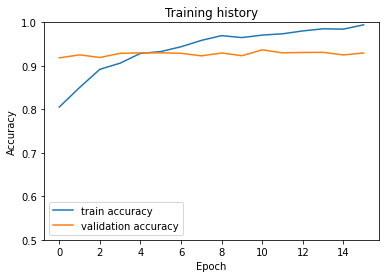

In [ ]:
print(train_acc)
print(val_acc)

new_tensor = torch.tensor(train_acc, device = 'cpu')
print(new_tensor)

plt.plot(new_tensor, label='train accuracy')
plt.plot(val_acc, label='validation accuracy')
plt.title('Training history')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.ylim([0.5, 1]);

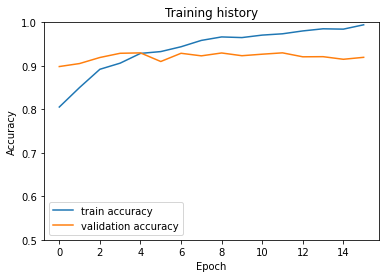

In [ ]:
import matplotlib.pyplot as plt

plt.plot(train_acc, label='train accuracy')
plt.plot(val_acc, label='validation accuracy')
plt.title('Training history')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.ylim([0.5, 1]);